# Biosynthesis Pipeline Demo 3

#### Biosynthesis of 2-pentanone starting with PKS and 1 step of non-PKS modifications

Authors: Tyler Backman and Yash Chainani

In the previous demo, we were not able to get feasible pathways to propionic acid using a combination of PKSs and non-PKSs for a non-PKS pathway comprising just one reaction. Here, we will try to synthesize 2-pentanone

### Import key dependencies

In [1]:
import json
import pandas as pd
from biosynth_pipeline import biosynth_pipeline
from retrotide import structureDB, designPKS
from rdkit import Chem

In [2]:
### initialize the feasibility classifier to plug into biosynth_pipeline object later
feasibility_model_path = '../models/updated_model_Apr28' # can pick the '.pkl' or '.dat' file too
calibration_model_path = '../models/updated_model_Apr28_calibration'
cofactors_path = '../data/coreactants_and_rules/all_cofactors_updated.csv'
fp_type = 'ecfp4'
nBits = 2048
max_species = 4
cofactor_positioning = 'by_descending_MW'

PX = biosynth_pipeline.feasibility_classifier(feasibility_model_path = feasibility_model_path,
                                                   calibration_model_path = calibration_model_path,
                                                   cofactors_path = cofactors_path,
                                                   fp_type = fp_type,
                                                   nBits = nBits,
                                                   max_species = max_species,
                                                   cofactor_positioning = cofactor_positioning)

### Combined 2-pentanone biosynthesis example via a 1 step non-PKS enzymatic reaction

In [14]:
# create an instance of the biosynth_pipeline class
pathway_sequence = ['pks', 'non_pks']  # run retrotide first then pickaxe
target_smiles = 'CC(CCC)=O' # 2-pentanone

non_pks_steps = 1

biosynth_pipeline_object = biosynth_pipeline.biosynth_pipeline(pathway_sequence=pathway_sequence,
                                             target_smiles=target_smiles,
                                             feasibility_classifier = PX,
                                             non_pks_steps=non_pks_steps)

In [15]:
biosynth_pipeline_object.run_pks_synthesis(pks_release_mechanism='thiolysis')


Starting PKS retrobiosynthesis with retrotide
---------------------------------------------
computing module 1
   testing 1404 designs
   best score is 0.44
computing module 2
   testing 1350 designs
   best score is 0.5
computing module 3
   testing 1350 designs
   best score is 0.3076923076923077

Best PKS design: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']]

Closest final product is: CC(=O)CCCC(=O)O

Finished PKS synthesis - closest product to the target using the top PKS design of [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']] is CC(=O)CCCC(=O)O. Moving onto non-PKS synthesis...


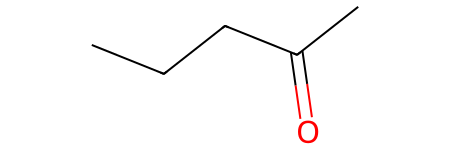

In [17]:
Chem.MolFromSmiles('CC(CCC)=O')

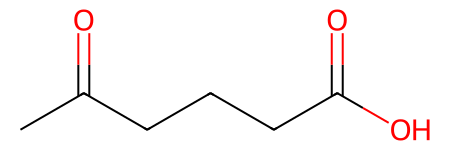

In [18]:
Chem.MolFromSmiles('CC(=O)CCCC(=O)O')

#### Examining PKS designs

We can print out the modules in the top PKS design:

In [16]:
repr(biosynth_pipeline_object.pks_designs[-1][0][0].modules)

'[["AT{\'substrate\': \'Methylmalonyl-CoA\'}", \'loading: True\'], ["AT{\'substrate\': \'Malonyl-CoA\'}", \'loading: False\'], ["AT{\'substrate\': \'Malonyl-CoA\'}", "KR{\'type\': \'B\'}", \'DH{}\', \'ER{}\', \'loading: False\']]'

#### Run non-PKS tailorings

In [6]:
non_pks_pathways = biosynth_pipeline_object.run_non_pks_synthesis_post_pks(max_designs=5)


Starting pickaxe expansion on CC(=O)CCCC(=O)O

----------------------------------------
Intializing pickaxe object


[19:05:31] WARNING: not removing hydrogen atom without neighbors
[19:05:31] WARNING: not removing hydrogen atom without neighbors



Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
1 target compounds loaded

----------------------------------------
Expanding Generation 1

Generation 1: 0 percent complete
Generation 1 finished in 4.9136269092559814 s and contains:
		165 new compounds
		180 new reactions

Done expanding Generation: 1.
----------------------------------------

Pathways found in 1 step/s between the top PKS product CC(=O)CCCC(=O)O and the eventual target product CCCC(C)=O
